In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.python.ops.logging_ops import Print

In [3]:
te_df = pd.read_csv('Combined_TE.csv')

In [4]:
print(te_df.head())

   Unnamed: 0        Team  Year Position  Value_cap_space  Value_draft_data  \
0           0  Buccaneers  2019       TE         5.658874        168.500283   
1           1     Packers  2019       TE         8.485654         74.891447   
2           2      Giants  2019       TE         0.409139        155.155097   
3           3  Commanders  2019       TE         0.611052         30.870044   
4           4    Patriots  2019       TE         1.424017          5.331186   

   Previous_AV  Current_AV  Previous_PFF  Current_PFF  ...  \
0          6.0         6.0     64.182220    56.750542  ...   
1          7.0         6.0     58.965724    60.298620  ...   
2          8.0         6.0     68.384703    60.821007  ...   
3          7.0         7.0     63.836041    51.438926  ...   
4          6.0         3.0     68.011263    52.240488  ...   

  Previous_targeted_qb_rating  Previous_targets  Previous_touchdowns  \
0                  104.758915         45.919897             5.377261   
1       

In [5]:
def check_correlation(df, metric):
    pd.set_option('display.max_rows', None)

    features = [col for col in df.columns if
                col != metric and col != 'weighted_avg_franchise_id' and col != 'weighted_avg_spikes' and col != 'Team' and col != 'Year' and col != 'Position']
    prev = [x for x in features if 'Previous' in x]
    prev.append('Current_' + metric)
    curr = [x for x in features if 'Previous' not in x]
    df['Total DVOA'] = df['Total DVOA'].astype(str).str.rstrip('%').astype(float) / 100.0
    l = [curr, prev]
    for item in l:
        # Filter only the relevant columns
        corr_df = df[item]

        # Compute the correlation matrix
        corr_matrix = corr_df.corr()
        target_corr = corr_matrix[['Current_' + metric]].drop('Current_' + metric).sort_values(by='Current_' + metric,
                                                                                               ascending=False)  # Select correlation with 'metric' and exclude itself

        # Print the correlation matrix
        print(f'Correlation Matrix for {metric}:\n', target_corr, '\n')
        pd.reset_option('display.max_rows')


In [6]:
te_df = te_df.drop(columns=['Unnamed: 0', 'Team', 'Year', 'Position', 'position'])

In [7]:
check_correlation(te_df, 'PFF')

Correlation Matrix for PFF:
                                               Current_PFF
weighted_avg_grades_offense                      0.980074
weighted_avg_grades_pass_route                   0.922753
weighted_avg_yprr                                0.873494
Current_AV                                       0.775827
weighted_avg_first_downs                         0.714361
weighted_avg_yards                               0.707208
weighted_avg_yards_after_catch                   0.616858
weighted_avg_receptions                          0.613988
weighted_avg_targets                             0.588298
weighted_avg_avoided_tackles                     0.568367
weighted_avg_touchdowns                          0.558774
weighted_avg_contested_receptions                0.495002
weighted_avg_grades_hands_drop                   0.478849
weighted_avg_contested_targets                   0.465099
weighted_avg_targeted_qb_rating                  0.434677
Total DVOA                                 

In [8]:
te_df = pd.read_csv('Combined_TE.csv')

In [9]:
te_df = te_df.sort_values(by=['Team', 'Year'])
te_df = te_df.drop(columns=['Unnamed: 0'])

# Display the sorted data
print(te_df.head())


      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       TE         1.073326         11.712493         11.0   
50   49ers  2020       TE         4.167508         19.697123         12.0   
70   49ers  2021       TE         4.306849          8.549011          9.0   
123  49ers  2022       TE         4.971182         15.377953          8.0   
12   Bears  2019       TE         0.759830         83.725492          5.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         12.0     85.088580    82.303247     27.90%  ...   
50          9.0     82.303247    70.863812      5.40%  ...   
70          8.0     70.863812    83.360252     19.50%  ...   
123        10.0     83.360252    75.179377     27.60%  ...   
12          3.0     64.011478    56.221746     -2.10%  ...   

     Previous_targeted_qb_rating  Previous_targets Previous_touchdowns  \
17                    107.115591        123.322581            4.833333   
50              

In [10]:
team_data = te_df.groupby('Team')
print(team_data.head)

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x28c5e1730>>


In [11]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['Previous_yprr', 'Previous_grades_pass_route', 'Previous_PFF', 
            'Previous_grades_offense', 'Previous_yards', 'Previous_first_downs', 'Previous_AV', 'Previous_targets']]  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [12]:
# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print('hi')  # Should now be (samples, 3, features)
print(X)

hi
[[[2.75838710e+00 8.93741935e+01 8.50885798e+01 8.86543011e+01
   1.32652151e+03 5.77956989e+01 1.10000000e+01 1.23322581e+02]
  [2.31692308e+00 8.33706294e+01 8.23032468e+01 8.25020979e+01
   7.42979021e+02 3.84685315e+01 1.20000000e+01 7.82097902e+01]
  [1.82000000e+00 7.58683206e+01 7.08638122e+01 7.13843511e+01
   3.66007634e+02 2.00839695e+01 9.00000000e+00 4.54770992e+01]]

 [[1.09234657e+00 6.26620939e+01 6.40114776e+01 6.67205776e+01
   4.83967509e+02 2.46678700e+01 5.00000000e+00 6.22057762e+01]
  [7.57467811e-01 5.32931330e+01 5.62217460e+01 5.36424893e+01
   7.80729614e+01 4.35622318e+00 3.00000000e+00 1.54849785e+01]
  [1.06800000e+00 6.21127273e+01 6.06979545e+01 6.12381818e+01
   3.71345455e+02 2.43636364e+01 6.00000000e+00 6.00727273e+01]]

 [[1.14850163e+00 5.74719870e+01 5.93828571e+01 5.96052117e+01
   3.77736156e+02 1.83843648e+01 7.00000000e+00 5.28794788e+01]
  [1.16128906e+00 6.35914062e+01 5.80466747e+01 6.29851563e+01
   3.91632812e+02 2.13945312e+01 5.000000

In [20]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv('Combined_TE.csv')
metric_column = 'Previous_PFF'

# Directly use 'Previous_PFF' for pff_column and 'Previous_AV' for av_column
pff_column = 'Previous_PFF'
av_column = 'Previous_AV'


# Print the column names to verify
print(f'Resolved Columns:')
print(f'pff_column: {pff_column}')
print(f'av_column: {av_column}')

# Training and testing data (years 2019, 2020, 2021 for training, 2022 for testing)
features_train = df[df['Year'] <= 2021][
    ['Previous_yprr', 'Previous_grades_pass_route', 'Previous_PFF', 
     'Previous_grades_offense', 'Previous_yards', 'Previous_first_downs', 
     'Previous_AV', 'Previous_targets', pff_column]
]
labels_train = df[df['Year'] <= 2021][metric_column]

features_test = df[df['Year'] == 2022][
    ['Previous_yprr', 'Previous_grades_pass_route', 'Previous_PFF', 
     'Previous_grades_offense', 'Previous_yards', 'Previous_first_downs', 
     'Previous_AV', 'Previous_targets', pff_column]
]
labels_test = df[df['Year'] == 2022][metric_column]

# Apply one-hot encoding to any categorical features if necessary (e.g., if you have 'Team')
features_train = pd.get_dummies(features_train)
features_test = pd.get_dummies(features_test)

# Ensure both datasets have the same columns after encoding
features_train, features_test = features_train.align(features_test, join='left', axis=1, fill_value=0)

# Standardize the features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),  # 10 neurons in one hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error')

# Train the model
history = model.fit(features_train, labels_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0)
# Predictions
train_predictions = model.predict(features_train).flatten()
test_predictions = model.predict(features_test).flatten()

# Calculate R² scores
train_r2 = r2_score(labels_train, train_predictions)
test_r2 = r2_score(labels_test, test_predictions)

print(f"Training R²: {train_r2:.2f}")
print(f"Test R²: {test_r2:.2f}")


Resolved Columns:
pff_column: Previous_PFF
av_column: Previous_AV
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Training R²: 0.95
Test R²: 0.95


/var/folders/f6/956qk__17zz75h8vn48l27z80000gn/T/ipykernel_68348/407552424.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted_PFF'] = test_predictions


KeyError: 'Actual_PFF'

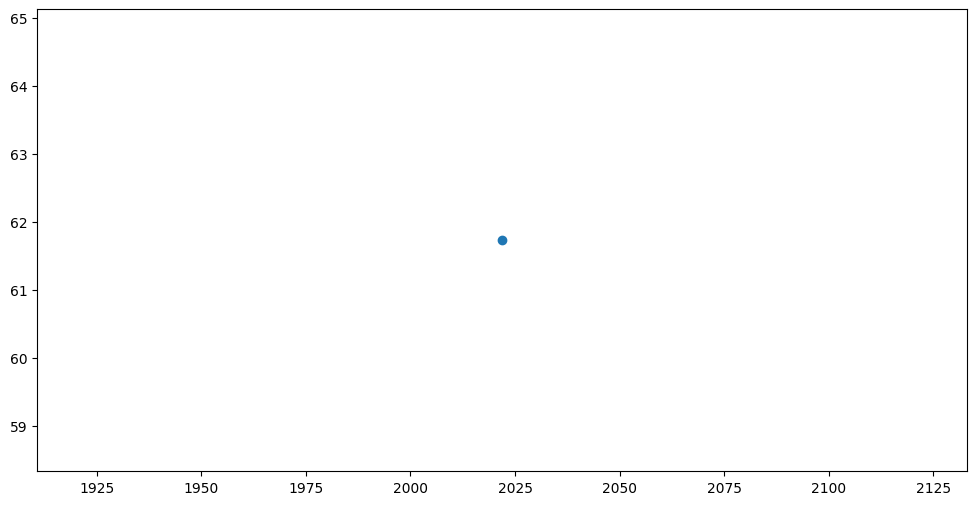

In [19]:
from matplotlib import pyplot as plt

# Add predictions to the dataframe for 2022 (test set)
df_test = df[df['Year'] == 2022]
df_test['Predicted_PFF'] = test_predictions

# Group by team and plot the actual vs predicted PFF
plt.figure(figsize=(12, 6))
teams = df_test['Team'].unique()

for team in teams:
    team_data = df_test[df_test['Team'] == team]
    plt.plot(team_data['Year'], team_data['Predicted_PFF'], label=f'Predicted {team}', linestyle='--', marker='o')
    plt.plot(team_data['Year'], team_data['Actual_PFF'], label=f'Actual {team}', linestyle='-', marker='x')

df_test.columns = df_test.columns.str.strip()  # Remove leading/trailing spaces if any

# Replace 'Year' with the correct column name for the year if necessary
year_column = 'Year'  # Assuming 'Year' is the column representing the year

# Step 2: Verify if the 'Year' column exists
if year_column not in df_test.columns:
    print(f"Error: '{year_column}' column is missing.")
else:
    # Step 3: Plot predictions and actual values for each team
    for team in teams:
        team_data = df_test[df_test['Team'] == team]

        # Plot the predicted PFF for the team
        plt.plot(team_data[year_column], team_data['Predicted_PFF'], 
                 label=f"Predicted {team}", linestyle='--', marker='o')

        # Plot the actual PFF for the team (using the provided metric column)
        plt.plot(team_data[year_column], team_data[metric_column], 
                 label=f"Actual {team}", linestyle='-', marker='x')

    # Step 4: Finalize the plot
    plt.title('Predicted vs Actual PFF for Each Team', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel('PFF')
    plt.legend()
    plt.show()
